In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [119]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
unemployment_df = pd.read_csv("projectdata/bls_table.csv")

# Display sample data
# unemployment
unemployment_df.head(10)

,Date,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
0,19-Jul,3.7,3.3,3.3,12.7,3.3,5.8,2.7,4.4
1,19-Aug,3.7,3.4,3.3,12.6,3.4,5.3,2.7,4.2
2,19-Sep,3.5,3.3,3.1,12.1,3.2,5.4,2.5,4.0
3,19-Oct,3.6,3.4,3.2,12.2,3.3,5.6,2.8,4.2
4,19-Nov,3.6,3.2,3.3,12.0,3.2,5.6,2.6,4.3
5,19-Dec,3.6,3.2,3.3,12.6,3.2,6.0,2.6,4.2
6,20-Jan,3.5,3.2,3.2,12.3,3.1,6.3,3.0,4.3
7,20-Feb,3.5,3.2,3.1,11.4,3.0,6.0,2.6,4.4
8,20-Mar,4.4,4.1,4.0,14.1,3.9,6.8,4.2,6.0
9,20-Apr,14.7,13.0,15.5,32.7,14.1,16.6,14.5,18.8


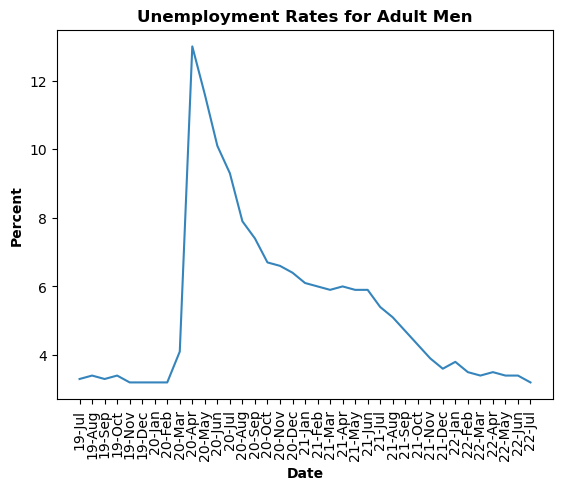

In [120]:
# line plot for Men
# unemployment_df['Men, 20 years and over'].plot.line(title=("Unemployment Rates for Men 20+ - July 2019 to July 2022"))
plt.plot(unemployment_df["Date"],unemployment_df["Men, 20 years and over"], alpha=0.9)
plt.title("Unemployment Rates for Adult Men", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Percent", fontweight="bold") 
plt.xticks(rotation=90)
plt.show()


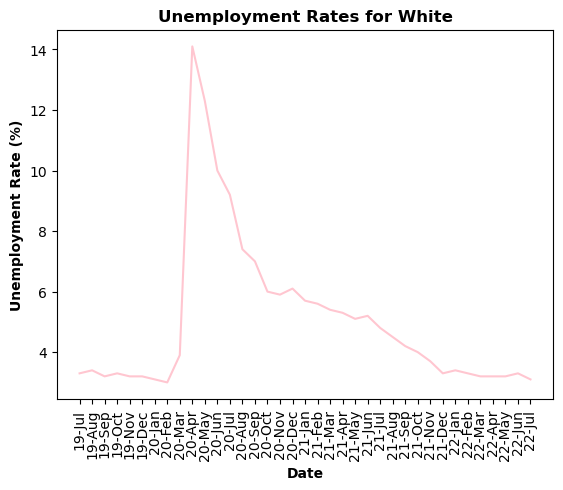

In [121]:
# line plot for Race - White
plt.plot(unemployment_df["Date"],unemployment_df["White"], alpha=0.9, color = "pink")
plt.title("Unemployment Rates for White", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel ("Unemployment Rate (%)", fontweight="bold") 
plt.xticks(rotation=90)
plt.show()

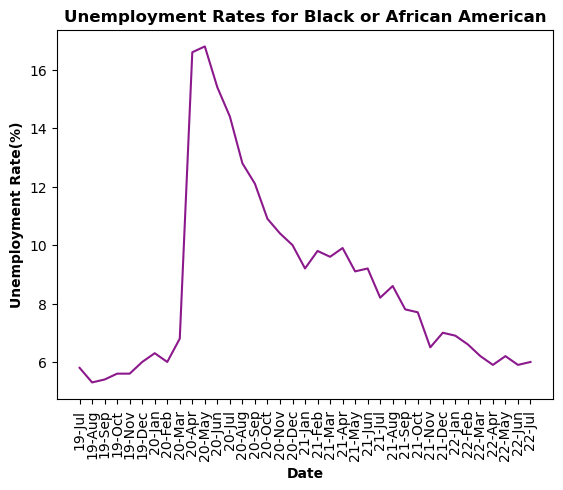

In [122]:
# line plot for Race - Black
plt.plot(unemployment_df["Date"],unemployment_df["Black or African American"], alpha=0.9, color = "purple")
plt.title("Unemployment Rates for Black or African American", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Unemployment Rate(%)", fontweight="bold") 
plt.xticks(rotation=90)
plt.show()

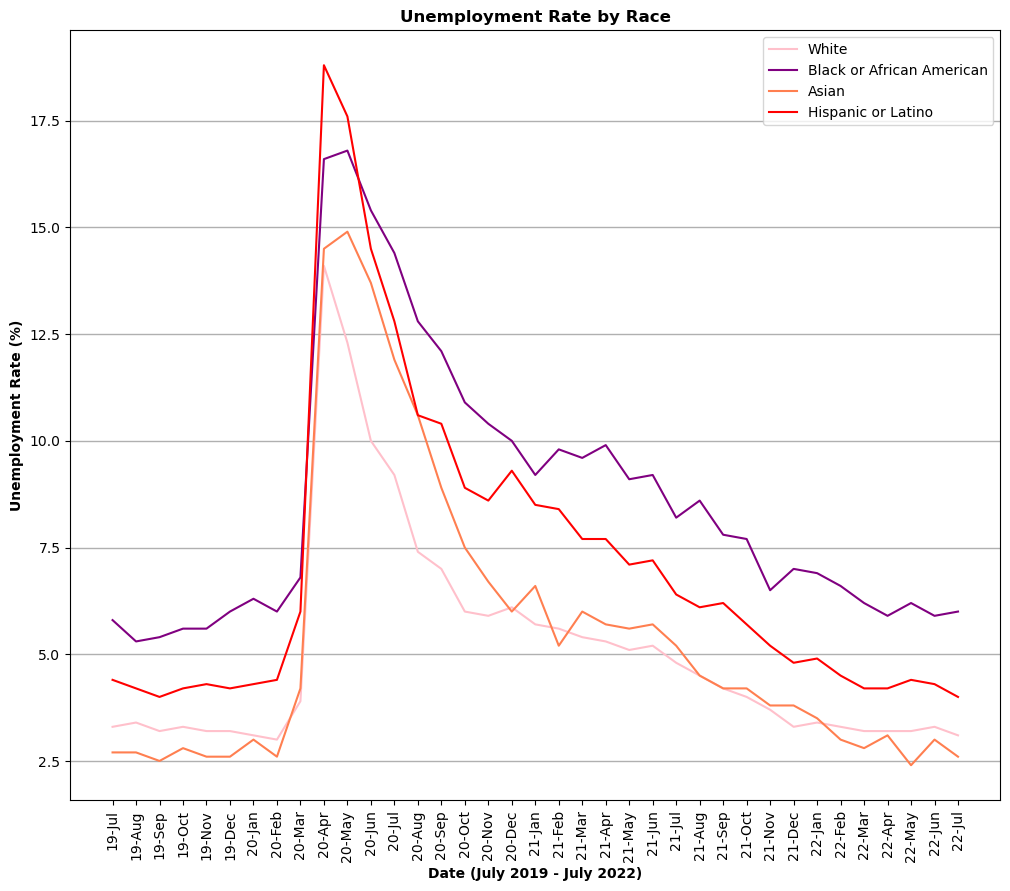

In [128]:
# Combined Plot by Race
fig,ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(unemployment_df["Date"], unemployment_df["White"], color="pink")
ax.plot(unemployment_df["Date"], unemployment_df["Black or African American"], color="purple")
ax.plot(unemployment_df["Date"], unemployment_df["Asian"], color="coral")
ax.plot(unemployment_df["Date"], unemployment_df["Hispanic or Latino"], color="red")
fig.set_size_inches(12,10)
plt.legend(['White', 'Black or African American', 'Asian', 'Hispanic or Latino'])
plt.title("Unemployment Rate by Race", fontweight="bold")
plt.xlabel("Date (July 2019 - July 2022)", fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontweight="bold")
plt.grid(axis="y", linestyle='-', linewidth=1)
plt.show()

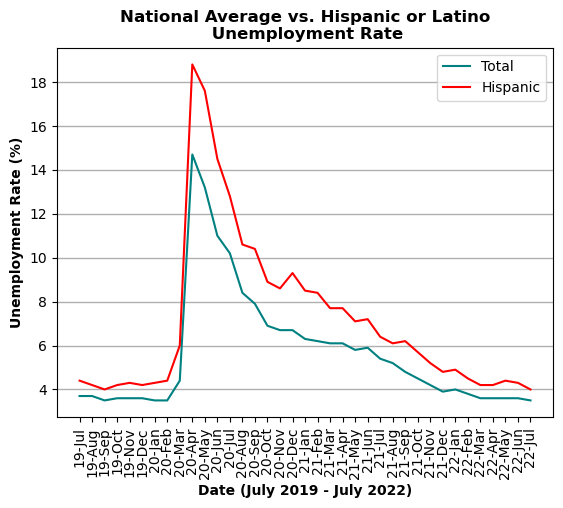

In [124]:
# Combined plot - national (total) unemployment rate vs. Hispanic
fig,ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(unemployment_df["Date"], unemployment_df["Total"], color="teal")
ax.plot(unemployment_df["Date"], unemployment_df["Hispanic or Latino"], color="red")
plt.legend(['Total', 'Hispanic'])
plt.title("National Average vs. Hispanic or Latino\n Unemployment Rate", fontweight="bold")
plt.xlabel("Date (July 2019 - July 2022)", fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontweight="bold")
plt.grid(axis="y", linestyle='-', linewidth=1)
plt.show()

In [125]:
from scipy.stats import ttest_ind

A two-sample t-test, also known as an independent-sample test,  compares the means of two independent sample groups. A two-sample t-test aims to compare the means of samples belonging to two different populations. 

State the following hypotheses for significance level =0.05:

Null Hypothesis (H0): Independent sample means are equal.
Alternative Hypothesis (Ha): Independent sample means are not equal. 

In [126]:
# Two sample t-test for Total vs. Hispanic or Latino
sample1 = unemployment_df["Total"]
sample2 = unemployment_df["Hispanic or Latino"]
t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -1.909022733622104
P-Value:  0.06024475037584336


For the null hypothesis, assuming sample means are equal:

Reject the null hypothesis if p-value <= alpha

Fail to reject the null hypothesis if p-value > alpha

Reject or fail to reject each hypothesis based on the result:
The results indicate a p-value of 0.06, which is greater than alpha=0.05, which means we fail to reject the null hypothesis, meaning there is not a significant difference between the national unemployment rate vs. hispanic unemployment rate. 

In [127]:
# Two sample t-test for Total vs. Hispanic or Latino
sample1 = unemployment_df["White"]
sample2 = unemployment_df["Hispanic or Latino"]
t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -2.729261516231586
P-Value:  0.007972797921545538


Now, when comparing unemployment rates of white to unemployment rates of hispanic, there is a significant difference. We can conclude that we reject the null hypothesis.

Thoughts/Observations:
When comparing unemployment rates by race from pre- to post-pandemic, we can see that the hispanic population was most heavily impacted by COVID-19, as their unemployment rates peaked much higher than other races during the height of the pandemic. 

Limitations: 
We are struggling to find cohesive datasets that show from 2019-2022. We attempted to look for unemployment rates by industry, but we could not find combined datasets for the appropriate time frame. 

Unanswered Questions:


The Covid-19 pandemic had a massive effect on the US economy in many 
ways. Impacting how money flowed and where it was distributed. News 
outlets were flooded with stories of businesses across the country being 
impacted severely, causing mass layoffs and closures. Looking at figX, you 
can see that in the years preceding the pandemic the US had seen some 
consistency in single digit unemployment rates, but unemployment 
skyrocketed on average with a total jump of 11.2%. However, the LatinX 
community experienced an even greater increase of almost 15% at the peak. Much of 
the research done for this project showed that service jobs (childcare, 
groundskeeping like lawn service, and food prep) were most populated by 
the LatinX group, other than Whites, and further explains why that 
community was so adversely affected by the series of events that occurred 
during the pandemic. *POC overall*